# Regression and Other Stories: Earnings
Predict respondents’ yearly earnings using survey data from 1990. See Chapters 6, 9 and 12 in Regression and Other Stories.

*Note* Not at Chapter 9 or 12 yet
*Note* This one right now deviates from online example

In [7]:
import arviz as az
from bambi import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
np.random.seed(0)

In [9]:
earnings = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")
earnings.head()

,height,weight,male,earn,earnk,ethnicity,education,mother_education,father_education,walk,exercise,smokenow,tense,angry,age
0,74,210.0,1,50000.0,50.0,White,16.0,16.0,16.0,3,3,2.0,0.0,0.0,45
1,66,125.0,0,60000.0,60.0,White,16.0,16.0,16.0,6,5,1.0,0.0,0.0,58
2,64,126.0,0,30000.0,30.0,White,16.0,16.0,16.0,8,1,2.0,1.0,1.0,29
3,65,200.0,0,25000.0,25.0,White,17.0,17.0,NaN,8,1,2.0,0.0,0.0,57
4,63,110.0,0,50000.0,50.0,Other,16.0,16.0,16.0,5,6,2.0,0.0,0.0,91


In [10]:
n = earnings.shape[0]

height_jitter_add = stats.uniform(-.2, .2).rvs(n)

In [11]:
model = Model(earnings)
fit_0 = model.fit('earn ~ height', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [earn_sd, height, Intercept]
INFO:pymc3:NUTS: [earn_sd, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [12]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(fit_0, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],-84669.56,6316.58
height[0],1588.24,94.16
earn_sd,21703.20,232.90


### Plot linear model draws

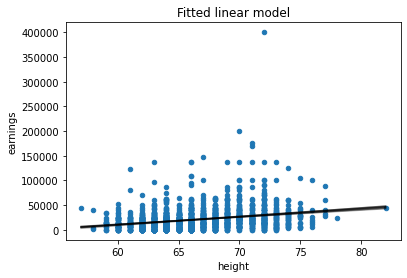

In [13]:
fig, ax = plt.subplots()

# Generate x range
height_domain = np.linspace(earnings["height"].min(), earnings["height"].max(), 100)

# Take 10 sample from posterior
num_samples = 10
chain_sample = fit_0.posterior.chain.to_series().sample(num_samples, replace=True)
draw_sample = fit_0.posterior.draw.to_series().sample(num_samples, replace=True)

for chain, draw in zip(chain_sample, draw_sample):
    a_hat = fit_0.posterior[{"draw":draw, "chain":chain}]["Intercept"].values
    b_hat = fit_0.posterior[{"draw":draw, "chain":chain}]["height"].values
    
    
    #breakpoint()
    # Plot Line
    ax.plot(height_domain, a_hat+b_hat*height_domain, c="black", alpha=.3)

# Add median line later
    
# Add scatter plot
earnings.plot(kind="scatter", x="height", y="earn", ax=ax)
ax.set_xlabel("height")
ax.set_ylabel("earnings")
ax.set_title("Fitted linear model");

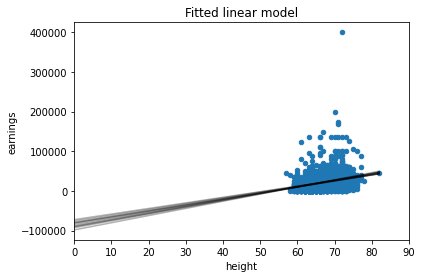

In [14]:
fig, ax = plt.subplots()

# Generate x range
height_domain = np.linspace(0, earnings["height"].max(), 100)

# Take 10 sample from posterior
num_samples = 10
chain_sample = fit_0.posterior.chain.to_series().sample(num_samples, replace=True)
draw_sample = fit_0.posterior.draw.to_series().sample(num_samples, replace=True)

for chain, draw in zip(chain_sample, draw_sample):
    a_hat = fit_0.posterior[{"draw":draw, "chain":chain}]["Intercept"].values
    b_hat = fit_0.posterior[{"draw":draw, "chain":chain}]["height"].values
    
    
    #breakpoint()
    # Plot Line
    ax.plot(height_domain, a_hat+b_hat*height_domain, c="black", alpha=.3)

# Add median line later
    
# Add scatter plot
earnings.plot(kind="scatter", x="height", y="earn", ax=ax)
ax.set_xlabel("height")
ax.set_ylabel("earnings")
ax.set_title("Fitted linear model")
ax.set_xlim(0, 90);

### Plot linear model draws with x-axis extended to 0

In [15]:
# TODO

### Predict earnings in thousands dollars

In [16]:
earnings["earnk"] = earnings["earn"]/1000
model = Model(earnings)
results = model.fit('earnk ~ height + male', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [earnk_sd, male, height, Intercept]
INFO:pymc3:NUTS: [earnk_sd, male, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [17]:
coefs = az.summary(results, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],-25.41,7.97
height[0],0.64,0.12
male[0],10.63,0.98
earnk_sd,21.41,0.24


for plotting scale back to dollar scale

In [18]:
coefs*1000

,Median,MAD_SD
Intercept[0],-25410.0,7970.0
height[0],640.0,120.0
male[0],10630.0,980.0
earnk_sd,21410.0,240.0


### Include male/female

In [21]:
# TODO

### Include interaction

## Linear regression on log scale
### Models on log scale

In [43]:
# Bambi can't transform columns using the model string specification so we'll use numpy and pandas directly instead

# Add a small value to 0 earnings so we don't get np.inf
earnings["log_earn"] = np.log(earnings["earn"])

In [44]:
model = Model(earnings[earnings["earn"]>0])
logmodel_1 = model.fit('log_earn ~ height', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_earn_sd, height, Intercept]
INFO:pymc3:NUTS: [log_earn_sd, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
The acceptance probability does not match the target. It is 0.8813645835543403, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8903952049450685, but should be close to 0.8. Try to increase the number of tuning steps.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [45]:
# These values don't match closely with the book for some reason
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(logmodel_1, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],5.92,0.25
height[0],0.06,0.00
log_earn_sd,0.88,0.01


### Model on log10 scale

In [41]:
earnings["log10_earn"] = np.log10(earnings["earn"])

In [42]:
model = Model(earnings[earnings["earn"]>0])
log10model_1 = model.fit('log10_earn ~ height', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log10_earn_sd, height, Intercept]
INFO:pymc3:NUTS: [log10_earn_sd, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
The acceptance probability does not match the target. It is 0.9141759265310473, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8997701250727357, but should be close to 0.8. Try to increase the number of tuning steps.
There were 197 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 197 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5857616056517163, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
INFO:pymc3:The rhat statistic is la

### Model on log scale with two predictors

In [47]:
model = Model(earnings[earnings["earn"]>0])
logmodel_2 = model.fit('log_earn ~ height+male', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_earn_sd, male, height, Intercept]
INFO:pymc3:NUTS: [log_earn_sd, male, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [48]:
# These values don't match closely with the book for some reason
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(logmodel_2, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],7.97,0.35
height[0],0.02,0.01
male[0],0.37,0.04
log_earn_sd,0.87,0.01


### Model on log scale with two predictors

In [49]:
# Bambi can't transform columns using the model string specification so we'll use numpy and pandas directly instead

# Add a small value to 0 earnings so we don't get np.inf
earnings["log_height"] = np.log(earnings["height"])

In [50]:
model = Model(earnings[earnings["earn"]>0])
logmodel_2 = model.fit('log_earn ~ log_height+male', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_earn_sd, male, log_height, Intercept]
INFO:pymc3:NUTS: [log_earn_sd, male, log_height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 15 divergences after tuning. Increase `target_accept` or reparameterize.
There were 264 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 264 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5685629891858565, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8861069915604869, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.2 for some parameters.
The number of effective samples is smaller than 10% for 

In [ ]:
# These values don't match closely with the book for some reason
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(logmodel_2, stat_funcs=func_dict, extend=False, round_to=2)
coefs

### Model on log scale with two predictors and interaction

In [53]:
model = Model(earnings[earnings["earn"]>0])
logmodel_3 = model.fit('log_earn ~ height+male + height:male', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_earn_sd, height:male, male, height, Intercept]
INFO:pymc3:NUTS: [log_earn_sd, height:male, male, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 55 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [54]:
# These values don't match closely with the book for some reason
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(logmodel_3, stat_funcs=func_dict, extend=False, round_to=2)
coefs

,Median,MAD_SD
Intercept[0],8.56,0.44
height[0],0.01,0.01
male[0],-0.91,0.69
height:male[0],0.02,0.01
log_earn_sd,0.87,0.01


### Model on log scale with two predictors and interaction

In [55]:
# Bambi can't transform columns using the model string specification so we'll use numpy and pandas directly instead

# Add a small value to 0 earnings so we don't get np.inf
earnings["z_height"] = earnings["height"] - earnings["height"].mean()/earnings["height"].std()

In [56]:
model = Model(earnings[earnings["earn"]>0])
logmodel_3a = model.fit('log_earn ~ z_height + male + z_height:male', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [log_earn_sd, z_height:male, male, z_height, Intercept]
INFO:pymc3:NUTS: [log_earn_sd, z_height:male, male, z_height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/opt/conda/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


### PLot log models

In [ ]:
# TODO

### Plot log model on log scale

In [ ]:
# TODO

### Plot log model on linear scale

In [ ]:
# TODO

## Posterior predictive checking
### Posterior predictive checking for model in linear scale

In [ ]:
# TODO

### Posterior predictive checking for model in log scale

In [ ]:
# TODO

### Posterior predictive checking for model in linear scale

In [ ]:
# TODO

### Posterior predictive checking for model in log scale

In [ ]:
# TODO

### Posterior predictive checking for model in log-log scale

In [ ]:
# TODO